In [1]:
pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    3.0.0
astunparse                   1.6.3
certifi                      2024.12.14
charset-normalizer           3.4.1
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.1
cycler                       0.12.1
debugpy                      1.8.12
decorator                    5.1.1
exceptiongroup               1.2.2
executing                    2.1.0
flatbuffers                  24.12.23
fonttools                    4.55.3
gast                         0.6.0
google-pasta                 0.2.0
grpcio                       1.69.0
h5py                         3.12.1
idna                         3.10
ipykernel                    6.29.5
ipython                      8.31.0
jedi                         0.19.2
jupyter_client               8.6.3
jupyter_core                 5.7.2
keras                        3.8


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\inuzu\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [3]:
import tensorflow as tf

In [5]:
import matplotlib as plt

In [7]:
import numpy as np

In [9]:
import opencv

ModuleNotFoundError: No module named 'opencv'

In [11]:
pip install opencv-pyhton

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement opencv-pyhton (from versions: none)
ERROR: No matching distribution found for opencv-pyhton

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\inuzu\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [13]:
pip install opencv-python

     ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
     ---------------------------------------- 0.1/39.5 MB 1.7 MB/s eta 0:00:24
     ---------------------------------------- 0.1/39.5 MB 1.7 MB/s eta 0:00:24
     ---------------------------------------- 0.2/39.5 MB 1.7 MB/s eta 0:00:24
     ---------------------------------------- 0.3/39.5 MB 1.8 MB/s eta 0:00:23
     ---------------------------------------- 0.3/39.5 MB 1.8 MB/s eta 0:00:23
     ---------------------------------------- 0.3/39.5 MB 1.8 MB/s eta 0:00:23
     ---------------------------------------- 0.3/39.5 MB 1.8 MB/s eta 0:00:23
     ---------------------------------------- 0.3/39.5 MB 1.8 MB/s eta 0:00:23
     ---------------------------------------- 0.3/39.5 MB 1.8 MB/s eta 0:00:23
     ---------------------------------------- 0.3/39.5 MB 1.8 MB/s eta 0:00:23
     ---------------------------------------- 0.3/39.5 MB 1.8 MB/s eta 0:00:23
     ---------------------------------------- 0.3/39.5 MB 1


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\inuzu\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [13]:
import os 
import tensorflow as tf

In [15]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [17]:
len(gpus)

0

In [19]:
import cv2
import imghdr

In [21]:
data_dir = 'data'

In [25]:
import numpy as np
from matplotlib import pyplot as plt

In [53]:
data = tf.keras.utils.image_dataset_from_directory('data', batch_size=32)

Found 970 files belonging to 2 classes.


In [55]:
data_iterator = data.as_numpy_iterator()

In [57]:
batch = data_iterator.next()

In [58]:
len(batch)

2

In [59]:
#images as arrays
batch[0].shape

(32, 256, 256, 3)

In [63]:
batch[1]

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int32)

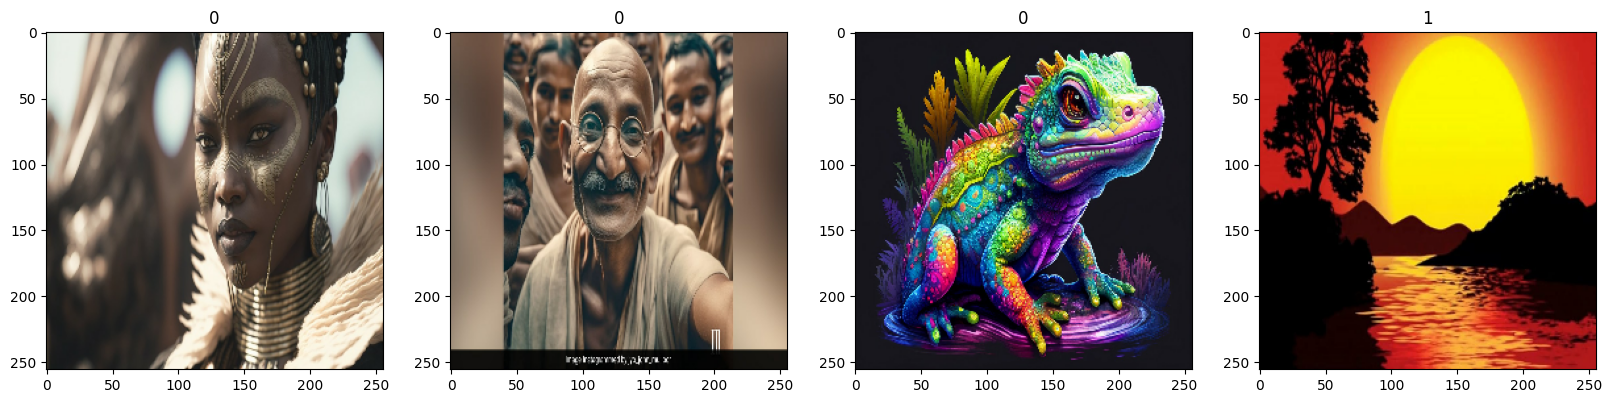

In [65]:
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [67]:
data = data.map(lambda x,y: (x/255,y))

In [71]:
scaled_iterator = data.as_numpy_iterator()

In [79]:
scaled_iterator.next()[0].max()

np.float32(1.0)

In [81]:
len(data)

31

In [101]:
train_size = 22
val_size = int(len(data)*.2)
test_size = 3

In [103]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size).take(test_size)

In [113]:
###deep neural network

In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [149]:
model = Sequential()

In [151]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [153]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [155]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [157]:
logdir='logs'

In [159]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [161]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 308ms/step - accuracy: 0.5010 - loss: 1.2576 - val_accuracy: 0.5469 - val_loss: 0.6854
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 302ms/step - accuracy: 0.5495 - loss: 0.6752 - val_accuracy: 0.6510 - val_loss: 0.6366
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 271ms/step - accuracy: 0.6773 - loss: 0.6225 - val_accuracy: 0.6302 - val_loss: 0.6394
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 295ms/step - accuracy: 0.6980 - loss: 0.5922 - val_accuracy: 0.7552 - val_loss: 0.5439
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 288ms/step - accuracy: 0.7902 - loss: 0.5074 - val_accuracy: 0.7448 - val_loss: 0.5259
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 314ms/step - accuracy: 0.8243 - loss: 0.4148 - val_accuracy: 0.7708 - val_loss: 0.4635
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 327ms/step - accuracy: 0.8736 - loss: 0.3425 - val_accuracy: 0.8177 - val_loss: 0.4203
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 7s 302ms/step - accuracy: 0.8766 - loss: 0.2830 - val_accuracy: 0.

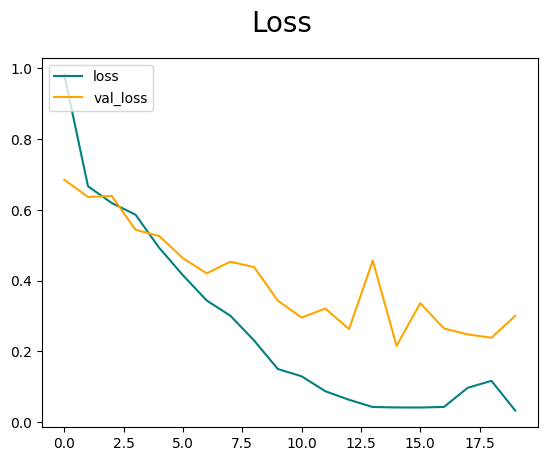

In [163]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color ='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

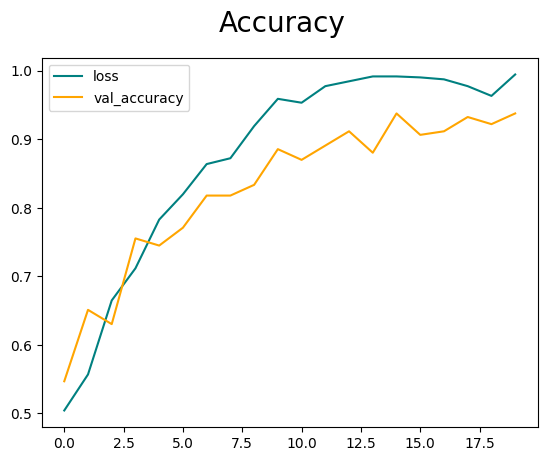

In [165]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='loss')
plt.plot(hist.history['val_accuracy'], color ='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [167]:
###evaluation

In [169]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [175]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [177]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [179]:
print(f'Presicion:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Presicion:0.9473684430122375, Recall:0.9230769276618958, Accuracy:0.9479166865348816


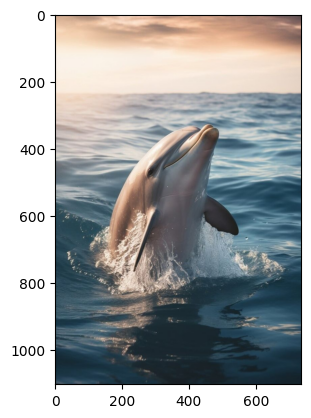

In [183]:
img = cv2.imread('aitest.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

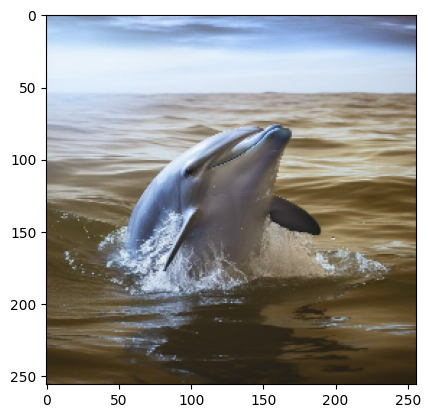

In [185]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [187]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


In [189]:
yhat

array([[0.23525855]], dtype=float32)

In [191]:
from tensorflow.keras.models import load_model

In [196]:
model.save(os.path.join('models','airealmodel.keras'))